In [1]:
import pylabnet.hardware.awg.zi_hdawg as zi_hdawg
from pylabnet.utils.logging.logger import LogClient


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import clear_output, display

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pylabnet.network.client_server import agilent_e4405B
import pylabnet.hardware.spectrum_analyzer.agilent_e4405B as sa_hardware

#!pip install seaborn
import itertools as it
import pandas as pd
import seaborn as sns

from pylabnet.utils.logging.logger import LogService
from pylabnet.network.core.generic_server import GenericServer
import os
import sys
from pylabnet.utils.iq_upconversion.optimizer import IQOptimizer, IQOptimizer_GD, IQOptimizer_GD_multifreq
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer as IQ_w_ports
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer_GD
from pylabnet.network.client_server import HMC_T2220

from pylabnet.network.client_server.agilent_83732b import Client

import seaborn as sns

In [2]:
dev_id = 'dev8354'
# Instantiate Hardware class
hd = zi_hdawg.Driver(dev_id, None)

mw = Client(
    host='140.247.189.50', 
    port=25237
)

sa = agilent_e4405B.Client(
    host='140.247.189.24',
    port=9754
)

# Reset spectrum analzyer
sa.write('*RST')

(6, <StatusCode.success: 0>)

In [39]:
mw.set_freq(10e9)

In [40]:
mw.set_power(14)

In [42]:
mw.output_off()

In [24]:
c_freq = 11e9
freq_span = 5e9

In [26]:
freq = np.linspace(400e6,500e6,50)

meas = np.zeros([len(freq), 401])

sa.set_center_frequency(c_freq)
sa.set_frequency_span(freq_span)

oscillator = 1

In [38]:
hd.setd('oscs/{}/freq'.format(oscillator-1), 300e6)

In [33]:
for ii in range(len(freq)):

    hd.setd('oscs/{}/freq'.format(oscillator-1), freq[ii])
    trace = sa.read_trace()
    meas[ii,:] = trace[:,1]

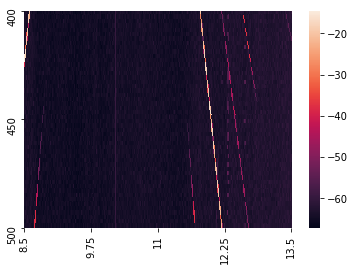

In [34]:
ax = sns.heatmap(meas)

ax.set_xticks([0, 100, 200, 300, 400])
ax.set_xticklabels([8.5, 9.75, 11, 12.25, 13.5])

ax.set_yticks([0, int(len(freq)/2), len(freq)])
ax.set_yticklabels([400, 450, 500])

plt.savefig('multiplier_sweep_filtered_mixed.png')

In [55]:
meas_mult_filt_mix

In [59]:
meas_mult_filt_mix_filt = meas

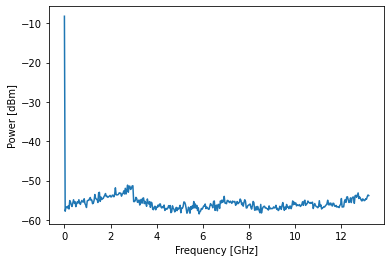

In [4]:
sa.plot_trace()